In [3]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# Test to see if population transfer efficiency is deterministic

In [17]:
system = Ps_system(N_atoms=250)
rabi0 = 2*np.pi*(1000e-3)
chirp = 2*np.pi*(4000e-3)
flip_pulse = {"rabi0" : rabi0, "detuning": 0,"chirp" : chirp,"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()
system.init_distribution_constant()
system.init_states_ground()

system.c_ops=[]
system.evolve()

10.8%. Run time:   2.21s. Est. time left: 00:00:00:18
21.6%. Run time:   4.08s. Est. time left: 00:00:00:14
32.4%. Run time:   5.70s. Est. time left: 00:00:00:11
40.5%. Run time:   6.62s. Est. time left: 00:00:00:09
51.4%. Run time:   7.95s. Est. time left: 00:00:00:07
62.2%. Run time:   9.03s. Est. time left: 00:00:00:05
70.3%. Run time:  10.16s. Est. time left: 00:00:00:04
81.1%. Run time:  11.86s. Est. time left: 00:00:00:02
91.9%. Run time:  14.69s. Est. time left: 00:00:00:01
Total run time:  16.71s


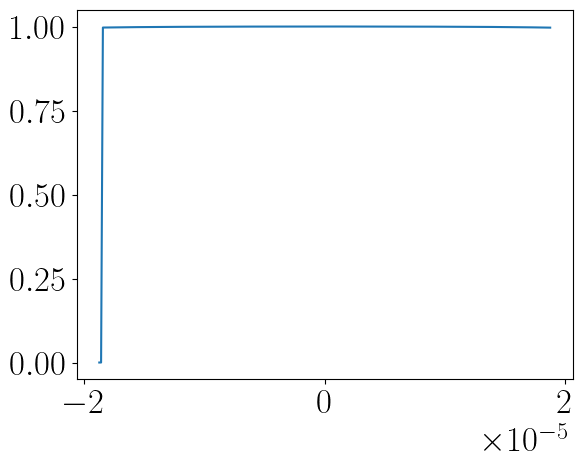

In [16]:
plt.plot(system.velocity_bins,np.asarray(system.saved_expect)[0,250:500,-1])
plt.show()

In [ ]:
system = Ps_system(1)
flip_pulse = {"rabi0" : rabi0, "detuning": 0,"chirp" : rabi0,"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

system.initial_pop = np.zeros(system.N_bins)
system.initial_pop[system.N_bins//2] = initial_state
system.initial_pop[system.N_bins//2] = 1-initial_state
